In [7]:
from rocketpy import Environment, SolidMotor, Rocket, Flight

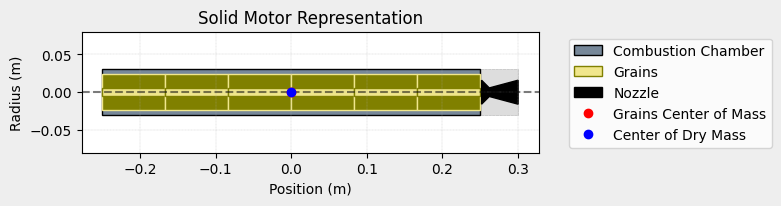

Nozzle Details
Nozzle Radius: 0.01588 m
Nozzle Throat Radius: 0.00565 m

Grain Details
Number of Grains: 6
Grain Spacing: 0 m
Grain Density: 1479.307 kg/m3
Grain Outer Radius: 0.0237 m
Grain Inner Radius: 0.00565 m
Grain Height: 0.0834 m
Grain Volume: 0.000 m3
Grain Mass: 0.205 kg

Motor Details
Total Burning Time: 4.1 s
Total Propellant Mass: 1.232 kg
Average Propellant Exhaust Velocity: 1851.818 m/s
Average Thrust: 556.449 N
Maximum Thrust: 915.996 N at 0.057 s after ignition.
Total Impulse: 2281.440 Ns



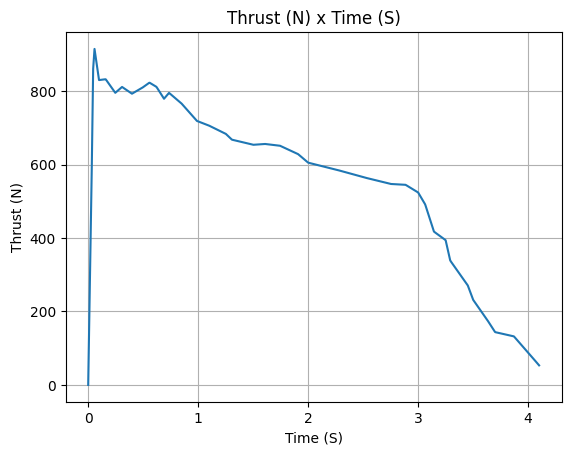

In [8]:
K480 = SolidMotor(
    thrust_source="AeroTech_K480W.csv",
    dry_mass=0.827,
    dry_inertia=(.001483,.001483,.000578),
    nozzle_radius=.01588,
    grain_number=6,
    grain_density=1479.307,
    grain_outer_radius=.0237,
    grain_initial_inner_radius=.00565,
    grain_initial_height=.0834,
    grain_separation=0,
    grains_center_of_mass_position=0,
    center_of_dry_mass_position=0,
    nozzle_position=.2502 + .05,
    burn_time=4.1,
    throat_radius=.00565,
    coordinate_system_orientation="combustion_chamber_to_nozzle",
)
K480.draw()
K480.info()

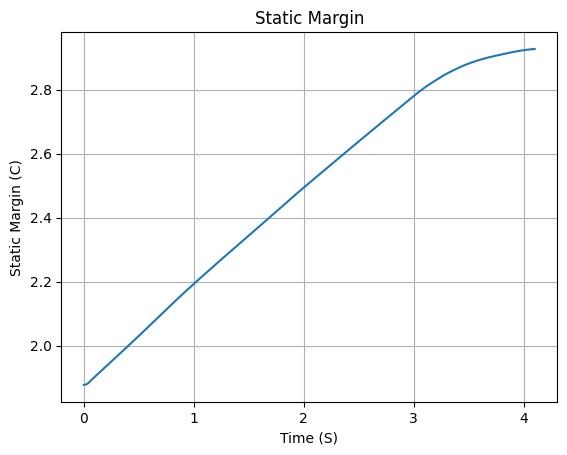

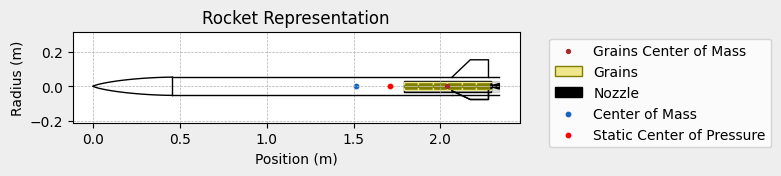

In [26]:
OneL = Rocket (
    mass = 5.049,
    radius = .0525,
    inertia = (2.21, 2.21, .00696),
    coordinate_system_orientation = "nose_to_tail",
    center_of_mass_without_motor = 1.30,
    power_off_drag = "./CDOFF.csv",
    power_on_drag = "./CDON.csv"
)

nose_cone = OneL.add_nose(length = .457, kind = "lvhaack", position = 0)
fin_set = OneL.add_trapezoidal_fins(n=3, root_chord=.21, tip_chord=.105, span=.1, position=2.0673, cant_angle=0)
OneL.add_motor(K480, 2.29-.2502)
Main = OneL.add_parachute("Main", cd_s=.97, trigger="apogee")
OneL.plots.static_margin()
OneL.plots.draw()


Gravity Details

Acceleration of gravity at surface level:    9.7913 m/s²
Acceleration of gravity at   3.400 km (ASL): 9.7852 m/s²


Launch Site Details

Launch Date: 2024-11-21 12:00:00 UTC
Launch Site Latitude: 32.99025°
Launch Site Longitude: -106.97500°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315468.64 W    3651938.65 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1400.0 m


Atmospheric Model Details

Atmospheric Model Type: custom_atmosphere
custom_atmosphere Maximum Height: 3.400 km

Surface Atmospheric Conditions

Surface Wind Speed: 5.39 m/s
Surface Wind Direction: 291.80°
Surface Wind Heading: 111.80°
Surface Pressure: 855.97 hPa
Surface Temperature: 300.00 K
Surface Air Density: 0.994 kg/m³
Surface Speed of Sound: 347.22 m/s


Earth Model Details

Earth Radius at Launch site: 6371.83 km
Semi-major Axis: 6378.14 km
Semi-minor Axis: 6356.75 km
Flattening: 0.0034


Atmospheric Model Plots



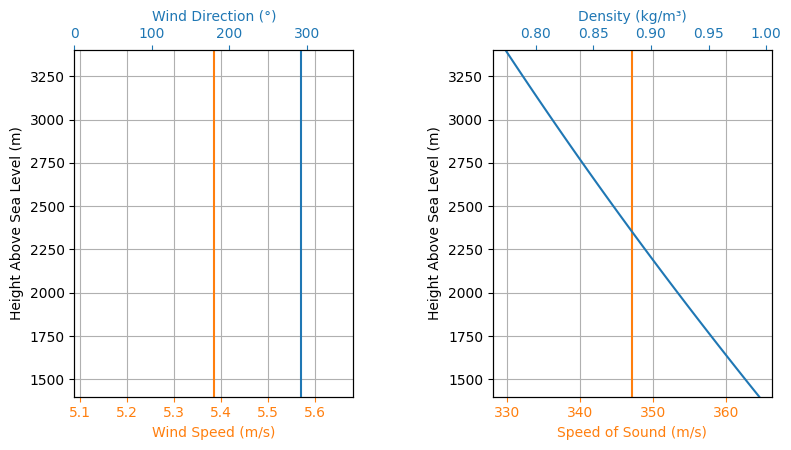


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 1400.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: 0.999 | e1: -0.044 | e2: 0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 1.878 c


Surface Wind Conditions

Frontal Surface Wind Speed: -2.00 m/s
Lateral Surface Wind Speed: -5.00 m/s


Launch Rail

Launch Rail Length: 5 m
Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Rail Departure State

Rail Departure Time: 0.327 s
Rail Departure Velocity: 32.561 m/s
Rail Departure Stability Margin: 1.978 c
Rail Departure Angle of Attack: 9.337°
Rail Departure Thrust-Weight Ratio: 11.811
Rail Departure Reynolds Number: 1.874e+05


Burn out State

Burn out time: 4.100 s
Altitude at burn out: 2108.796 m (ASL) | 708.796 m (AGL)
Rocket speed at burn out: 268.380 m/s
Freestream veloci

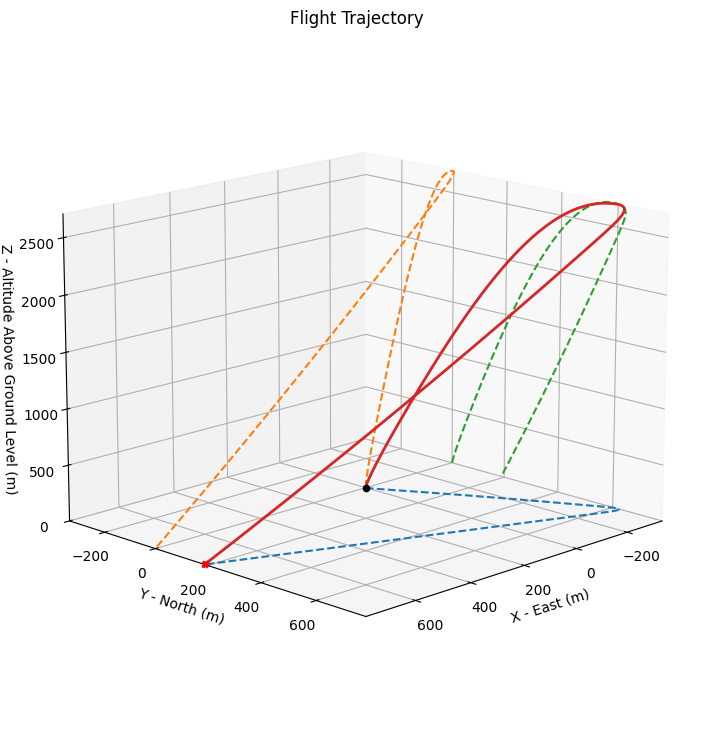



Trajectory Kinematic Plots



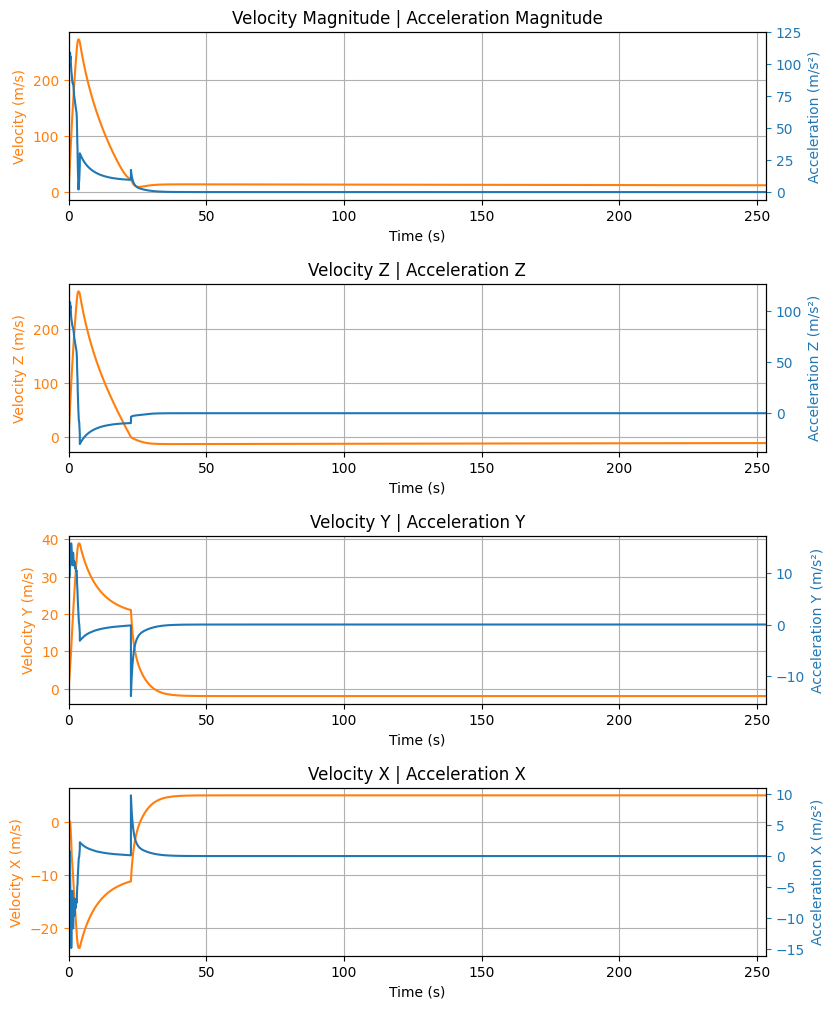



Angular Position Plots



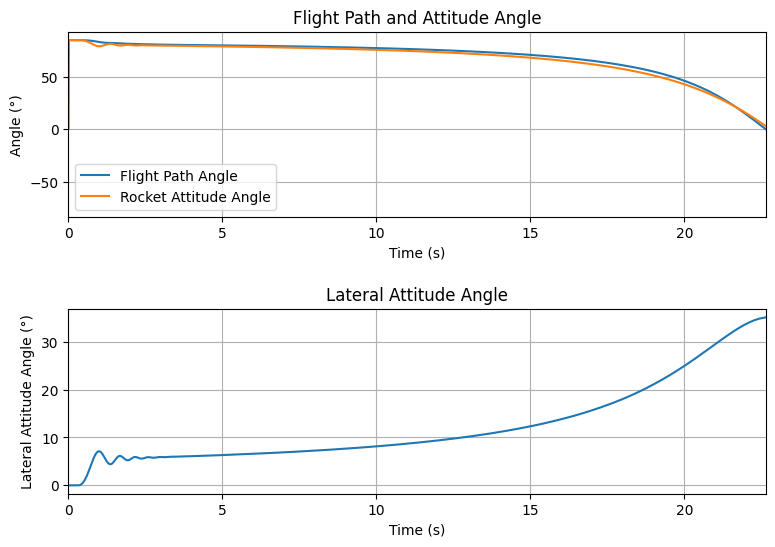



Path, Attitude and Lateral Attitude Angle plots



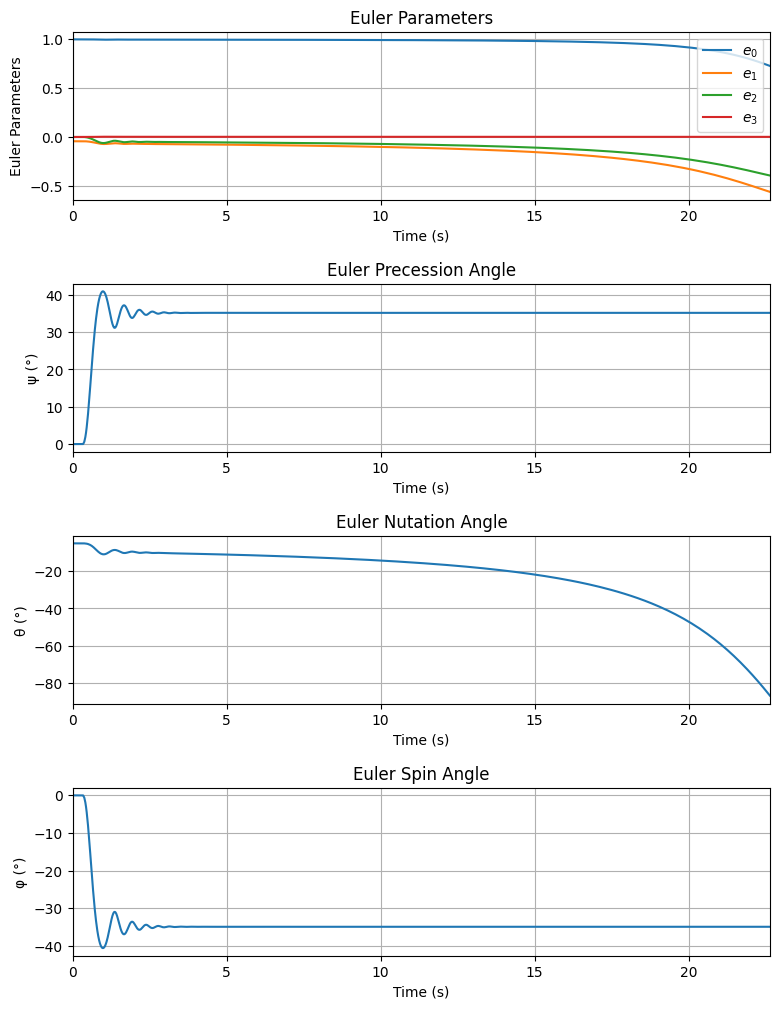



Trajectory Angular Velocity and Acceleration Plots



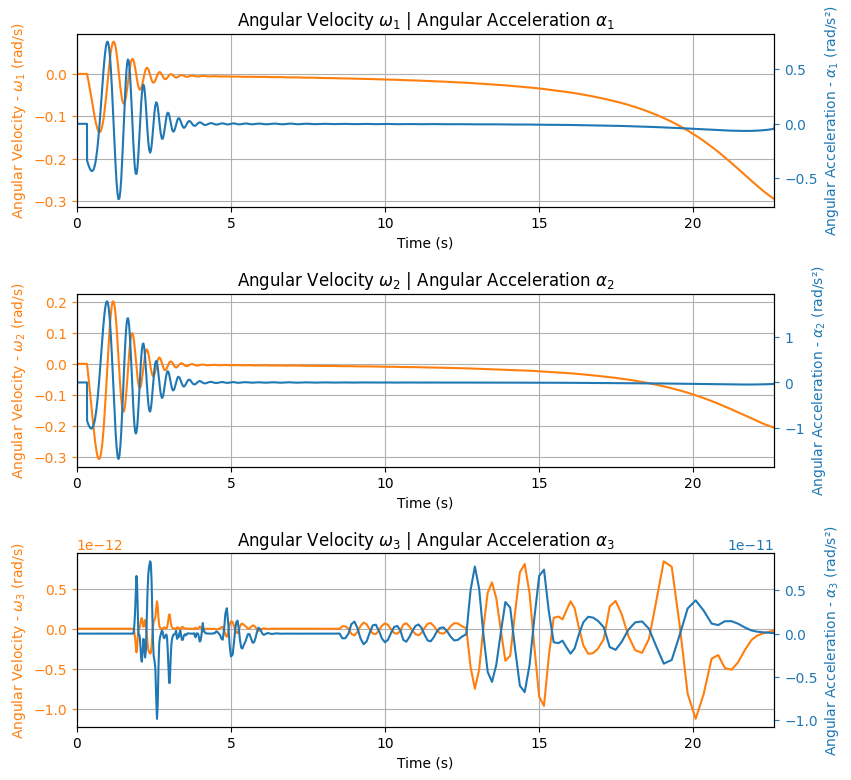



Aerodynamic Forces Plots



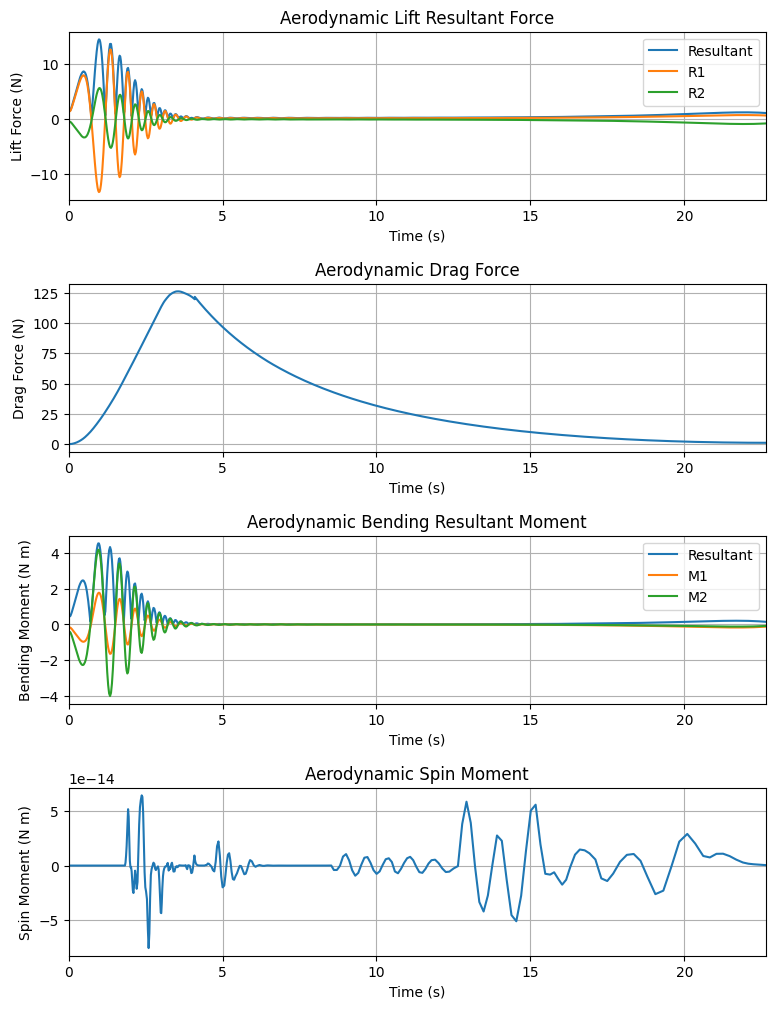



Rail Buttons Forces Plots

No rail buttons were defined. Skipping rail button plots.


Trajectory Energy Plots



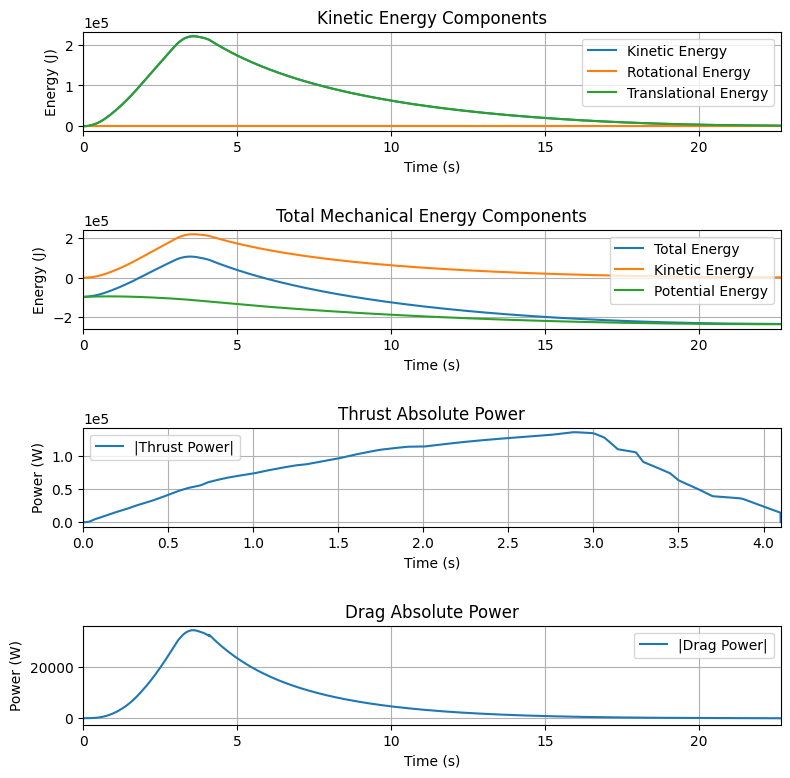



Trajectory Fluid Mechanics Plots



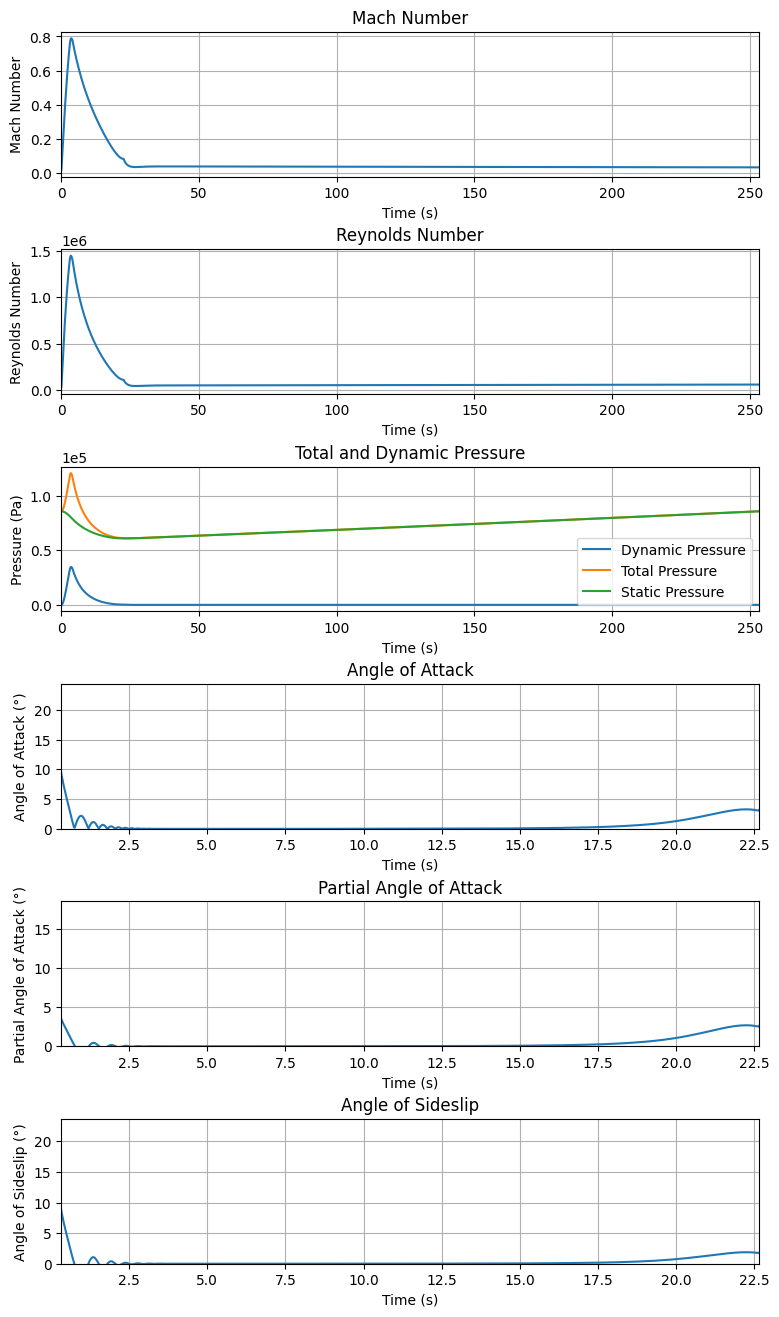



Trajectory Stability and Control Plots



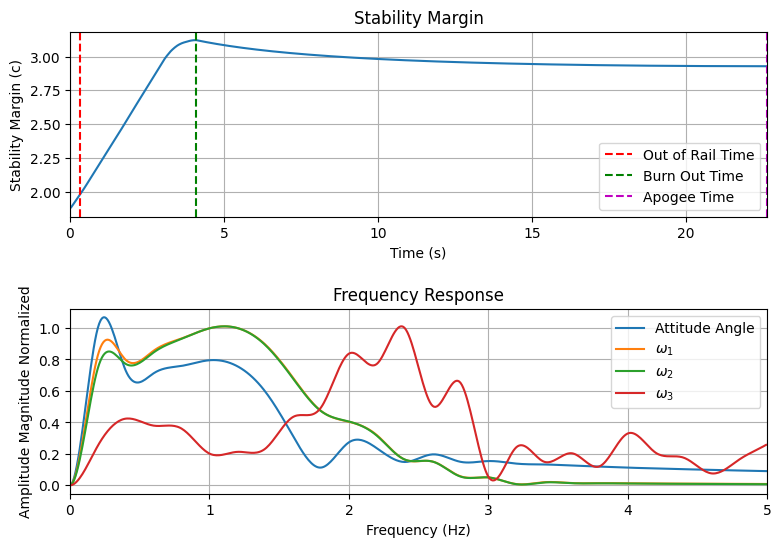



Rocket and Parachute Pressure Plots



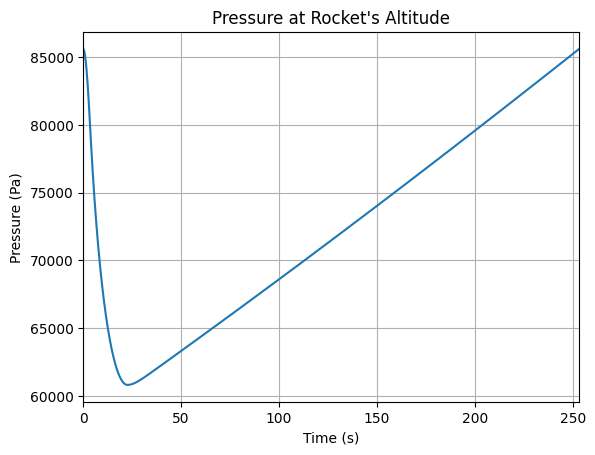


Parachute:  Main


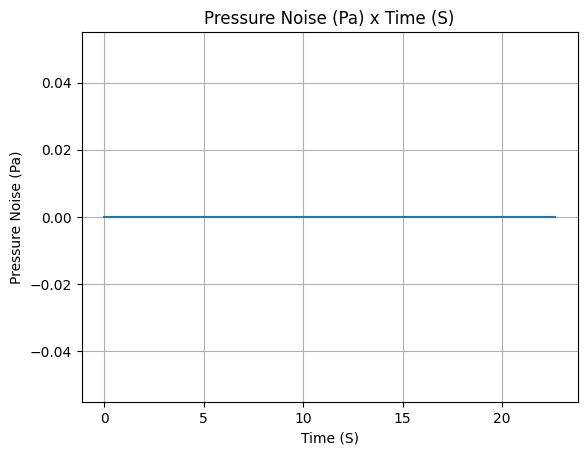

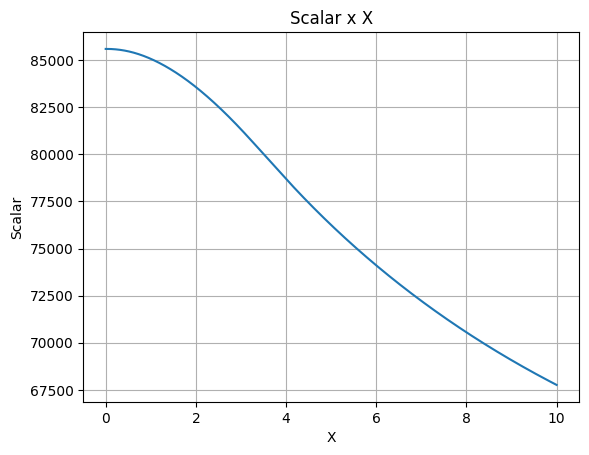

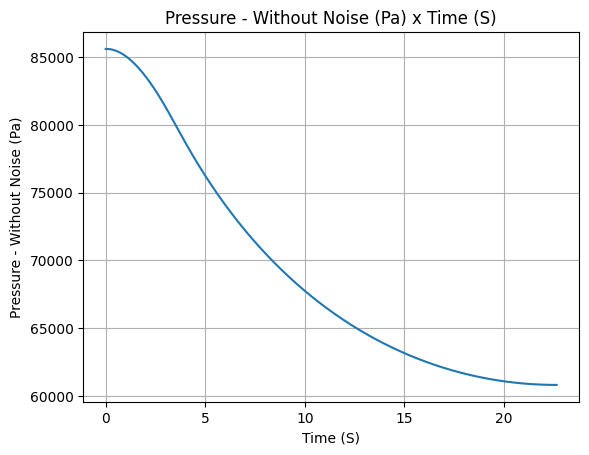

In [28]:
env = Environment(latitude=32.990254, longitude=-106.974998, elevation=1400)

import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)  # Hour given in UTC time

env.max_expected_height=3400

env.set_atmospheric_model(
    type="custom_atmosphere",
    pressure=None,
    temperature=300,
    wind_u=5,
    wind_v=-2
)

test_flight = Flight(
    rocket=OneL, 
    environment=env, 
    rail_length=5, 
    inclination=85, 
    heading=0
    )

env.info()

test_flight.all_info()